In [36]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
tf.__version__

'1.14.0'

# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [3]:
# your code here
play = pd.read_csv('tic-tac-toe.csv')
play.describe()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,True
freq,418,378,418,378,458,378,418,378,418,626


In [4]:
play_bin = pd.get_dummies(play)
play_bin["class"] = play_bin["class"].astype(int)

display(play_bin.head(3))
display(play_bin.shape)

# no need to normalize

,class,TL_b,TL_o,TL_x,TM_b,TM_o,TM_x,TR_b,TR_o,TR_x,...,MR_x,BL_b,BL_o,BL_x,BM_b,BM_o,BM_x,BR_b,BR_o,BR_x
0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1


(958, 28)

In [5]:
play_bin.columns

Index(['class', 'TL_b', 'TL_o', 'TL_x', 'TM_b', 'TM_o', 'TM_x', 'TR_b', 'TR_o',
       'TR_x', 'ML_b', 'ML_o', 'ML_x', 'MM_b', 'MM_o', 'MM_x', 'MR_b', 'MR_o',
       'MR_x', 'BL_b', 'BL_o', 'BL_x', 'BM_b', 'BM_o', 'BM_x', 'BR_b', 'BR_o',
       'BR_x'],
      dtype='object')

In [6]:
play_bin.dtypes

class    int64
TL_b     uint8
TL_o     uint8
TL_x     uint8
TM_b     uint8
TM_o     uint8
TM_x     uint8
TR_b     uint8
TR_o     uint8
TR_x     uint8
ML_b     uint8
ML_o     uint8
ML_x     uint8
MM_b     uint8
MM_o     uint8
MM_x     uint8
MR_b     uint8
MR_o     uint8
MR_x     uint8
BL_b     uint8
BL_o     uint8
BL_x     uint8
BM_b     uint8
BM_o     uint8
BM_x     uint8
BR_b     uint8
BR_o     uint8
BR_x     uint8
dtype: object

In [7]:
TARGET = ['class']
FEATS = ['TL_b', 'TL_o', 'TL_x', 'TM_b', 'TM_o', 'TM_x', 'TR_b', 'TR_o', 'TR_x', 
         'ML_b', 'ML_o', 'ML_x', 'MM_b', 'MM_o', 'MM_x', 'MR_b', 'MR_o', 'MR_x', 
         'BL_b', 'BL_o', 'BL_x', 'BM_b', 'BM_o', 'BM_x', 'BR_b', 'BR_o', 'BR_x']

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [8]:
from sklearn.model_selection import train_test_split

x_tr, y_tr, x_te, y_te = train_test_split(play_bin[FEATS], play_bin[TARGET], random_state = 10) 
#splits randomly and by percentage 75-25

x_train, x_test, y_train, y_test = [np.array(elemnt, dtype = float) for elemnt in [x_tr, y_tr, x_te, y_te]]

print(f"{x_train.shape}{type(x_train)} \t {y_train.shape}{type(y_train)}")
print(f"{x_test.shape}{type(x_test)} \t {y_test.shape}{type(y_test)}")

(718, 27)<class 'numpy.ndarray'> 	 (718, 1)<class 'numpy.ndarray'>
(240, 27)<class 'numpy.ndarray'> 	 (240, 1)<class 'numpy.ndarray'>


In [32]:
# NN architecture: sequential model with the layers
layer_size = 128

model = keras.models.Sequential([
    keras.layers.Dense(layer_size, activation = tf.nn.relu, input_shape = [len(FEATS)]),
    keras.layers.Dense(layer_size, activation = tf.nn.relu),
    keras.layers.Dense(layer_size, activation = tf.nn.relu),
    keras.layers.Dense(10,         activation = tf.nn.softmax) # softmax -> y_hat as probability
    ])

model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0015), #default learning_rate 0.001
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               3584      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 37,898
Trainable params: 37,898
Non-trainable params: 0
_________________________________________________________________


In [33]:
# training de NN w 3 hidden layers. for acc aprox to 1, 15 epochs is enough
history = model.fit(x_train, y_train, 
                    batch_size=35, 
                    epochs = 12, 
                    validation_split = 0.2)

Train on 574 samples, validate on 144 samples
Epoch 1/12
574/574 [==============================] - 0s 243us/sample - loss: 1.2663 - acc: 0.6098 - val_loss: 0.6266 - val_acc: 0.6042
Epoch 2/12
574/574 [==============================] - 0s 45us/sample - loss: 0.5617 - acc: 0.7265 - val_loss: 0.5823 - val_acc: 0.7014
Epoch 3/12
574/574 [==============================] - 0s 51us/sample - loss: 0.5434 - acc: 0.7021 - val_loss: 0.5544 - val_acc: 0.7431
Epoch 4/12
574/574 [==============================] - 0s 47us/sample - loss: 0.4702 - acc: 0.7648 - val_loss: 0.5012 - val_acc: 0.7431
Epoch 5/12
574/574 [==============================] - 0s 48us/sample - loss: 0.3758 - acc: 0.8293 - val_loss: 0.4313 - val_acc: 0.7917
Epoch 6/12
574/574 [==============================] - 0s 44us/sample - loss: 0.2804 - acc: 0.8902 - val_loss: 0.3208 - val_acc: 0.9028
Epoch 7/12
574/574 [==============================] - 0s 50us/sample - loss: 0.1837 - acc: 0.9443 - val_loss: 0.2384 - val_acc: 0.9097
Epoch 8/

In [34]:
def plot_training(history, metrics: list = ('loss',), figsize: tuple = (12, 5)):
    """ plots training selected metrics for every batch """
    
    epochs = range(1, len(history.history[metrics[0]]) + 1)
    fig, ax_arr = plt.subplots(1, len(metrics), figsize=figsize)

    if not isinstance(ax_arr, np.ndarray):
        ax_arr = np.array(ax_arr).reshape(1, )

    for i, metric in enumerate(metrics):
        ax_arr[i].plot(epochs, history.history[metric], color='k', linestyle='solid', label=metric, linewidth=2)
        ax_arr[i].plot(epochs, history.history[f"val_{metric}"], color='r', linestyle='dotted',
                       label=f'validation {metric}')
        ax_arr[i].set_ylabel(metric)
        ax_arr[i].set_xlabel('epochs')
        ax_arr[i].grid()
        ax_arr[i].legend()
        
    plt.show()

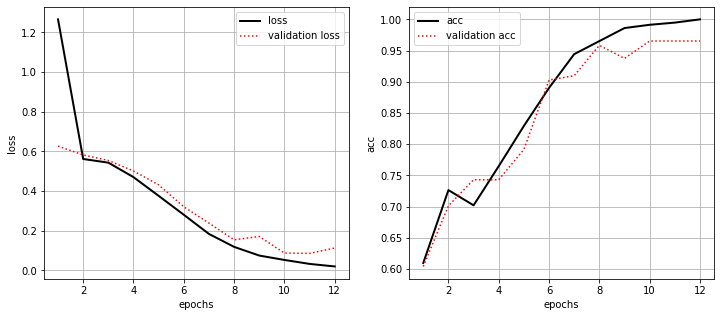

In [35]:
plot_training(history, metrics=['loss', 'acc'])

In [25]:
# evaluate the NN with test data
val_loss, val_accuracy = model.evaluate(x_test, y_test)

# save the model as tic-tac-toe.model
model.save('../model/tic-tac-toe.model')

240/240 [==============================] - 0s 20us/sample - loss: 0.0581 - acc: 0.9750


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [26]:
# load model
model_loaded = keras.models.load_model('../model/tic-tac-toe.model')

# make predictions
# got a WARNING from deprecated GlorotUniform with dtype
y_pred = model_loaded.predict(x_test) # prob distributions of y_hat

# check accuracy and loss of test data
loss, accuracy = model.evaluate(x_test, y_test)

240/240 [==============================] - 0s 15us/sample - loss: 0.0581 - acc: 0.9750


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [27]:
# the models achieves <0.1 loss & >0.95 accuracy for epoch less than 12-13.
# Batches have a high impact on diff between train and validation metrics.
# The lower the batch is in each epoch, the less difference there is between both

# learning rate is the jump the sgd makes from each propagation, 
# If the LR is very fast, it might oversee the lowest point while if its is very low, the NN needs more epochs to
# achieve a high accuracy metric

**Which approach(es) did you find helpful to improve your model performance?**

In [16]:
# Increse of epochs, since there is no noticeable of pc performance from 10 to 15.+
# Second option has been to reduce the batch of each epoch, to get a lower difference between val and train
# Third option would have been to try a higher learning rate

# Added an extra hidden layer to de NN to see difference in performance: when to acc 0.1 to acc 0.05